#PRACTICAL SESSION 3

STEP 1: Importing the libraries

In [1]:
# Important lybraries
import numpy as np
from matplotlib import pyplot as plt
import math
from data_analysis import*

STEP 2: Defining a class to create usable data

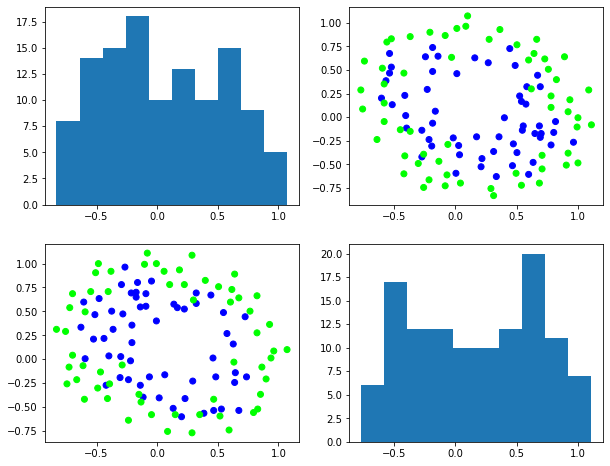

In [2]:
data = Data('P3_nn_microchip.csv')
data.splitData(0.2)
data.plotCorrelationMatrix()

STEP 3: Computing the derivatives

In [3]:
# Same as logistic regression we have some important functions for the model
def hypothesisFunction(X,theta):
  h = X@theta
  return h

def actFCN(z):
  g = 1/(1+math.e**(-z))
  g_der = z*(1-z)
  return g,g_der

def crossentroy(P,T):
  logP0 = np.where(P > 10**(-16), P, -16)
  logP1 = np.where(1-P > 10**(-16), 1-P, -16)
  L     = -np.mean(np.sum(T*np.log(logP0,out=logP0,where=logP0>0)+(1-T)*np.log(logP1,out=logP1,where=logP1>0),axis=1))
  L_der = (P-T)/(P*(1-P))
  return L,L_der

def regularization(l,theta):
  r  = l*0.5*np.sum(theta**2)
  r_der = l*theta
  return r,r_der

STEP 4: Forward and backward propagation

In [4]:
# Using the previous functions, create a new one that performs the forward propagation and returns the cost and the stored values of the activation functions
def forwardprop(theta,topology,X,Y,l):
  a = [X]
  cont = 0
  for k in range(len(topology)-1):
    theta_l = np.reshape(theta[cont:cont+topology[k]*topology[k+1]],(topology[k],topology[k+1]))
    cont = cont + topology[k]*topology[k+1]
    h = hypothesisFunction(a[k],theta_l)
    aux,_ = actFCN(h)
    a.append(aux)
  R,_ = regularization(l,theta)
  L,_ = crossentroy(a[-1],Y)
  J = L + R
  return J,a

In [5]:
# Define a function that performs the backward propagation and returns the gradient of the model
def backprop(theta,topology,a,Y,l):
  delta = []
  m    = Y.shape[0]
  cont = len(theta)
  grad = np.zeros((theta.shape[0],1))
  for k in range(len(topology)-1,0,-1):
    _,act_der = actFCN(a[k])
    if k == len(topology)-1:
      _,L_der = crossentroy(a[-1],Y)
      delta.insert(0,L_der*act_der)
    else:
      theta_l = np.reshape(theta[cont:cont+topology[k]*topology[k+1]],(topology[k],topology[k+1]))
      delta.insert(0,delta[0]@theta_l.T*act_der)
    grad[cont-topology[k-1]*topology[k]:cont] = 1/m*np.reshape((a[k-1].T@delta[0]),(topology[k-1]*topology[k],1))
    cont = cont-topology[k-1]*topology[k]
  _,r_der = regularization(l,theta)
  grad = grad + r_der
  return grad

In [6]:
# Define a function predict really similar to forwardprop but which just returns the activation in the last layer (output)
def predict(theta,topology,X,l):
  a = [X]
  cont = 0
  for k in range(len(topology)-1):
    theta_l = np.reshape(theta[cont:cont+topology[k]*topology[k+1]],(topology[k],topology[k+1]))
    cont = cont + topology[k]*topology[k+1]
    h = hypothesisFunction(a[k],theta_l)
    aux,_ = actFCN(h)
    a.append(aux)
  return a[-1]

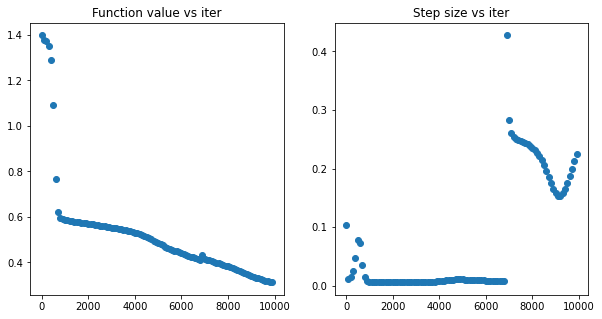


Train accuracy:  0.946236559139785 
Test accuracy:  0.5833333333333334


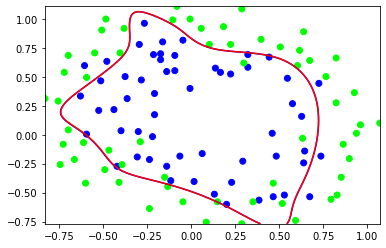

In [7]:
d = 2
l = 0.0
idx = [0,1]
hiddenlayers = [4,8]
lr = 0.5
theta0,Xtr,Ytr,topology = buildmodel(data.Xtrain,data.Ytrain,d,idx,hiddenlayers)
_,Xte,Yte,_ = buildmodel(data.Xtest,data.Ytest,d,idx,hiddenlayers)

F = lambda theta,X,Y: forwardprop(theta,topology,X,Y,l)
f = lambda theta,a,Y: backprop(theta,topology,a,Y,l)
gd = SGD(lr=lr,epochs=10000,batch=Xtr.shape[0],plot=True)
thetaOPT = gd.train(F,f,Xtr,Ytr,theta0)
PlotBoundary(data,thetaOPT,d,idx,topology,l)

tr = testAccuracy(Xtr,Ytr,thetaOPT,topology,l)
te = testAccuracy(Xte,Yte,thetaOPT,topology,l)
print('\nTrain accuracy: ',tr,'\nTest accuracy: ',te)
plt.show()

STEP 5: Multiclassification

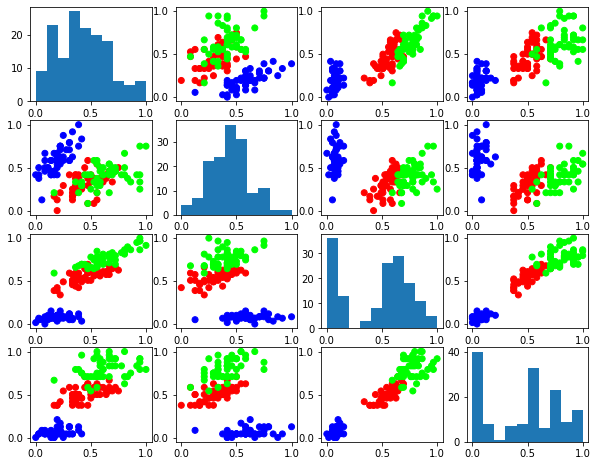

In [8]:
iris = Data('P3_nn_iris.csv')
iris.scale()
iris.splitData(0.2)
iris.plotCorrelationMatrix()

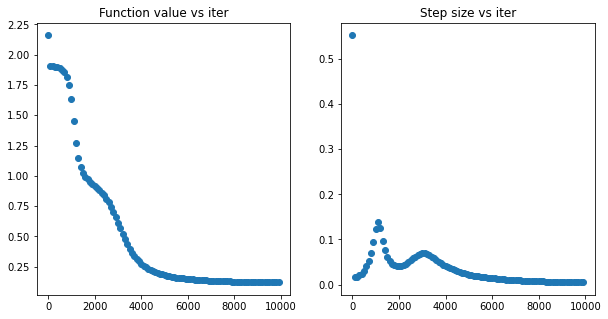


Train accuracy:  0.9747899159663865 
Test accuracy:  0.9


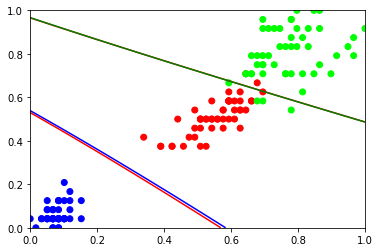

In [10]:
d = 1
l = 0.0
idx = [2,3]
hiddenlayers = [4,8]
lr = 0.1
theta0,Xtr,Ytr,topology = buildmodel(iris.Xtrain,iris.Ytrain,d,idx,hiddenlayers)
_,Xte,Yte,_ = buildmodel(iris.Xtest,iris.Ytest,d,idx,hiddenlayers)

F = lambda theta,X,Y: forwardprop(theta,topology,X,Y,l)
f = lambda theta,a,Y: backprop(theta,topology,a,Y,l)
gd = SGD(lr=lr,epochs=10000,batch=Xtr.shape[0],plot=True)
thetaOPT = gd.train(F,f,Xtr,Ytr,theta0)
PlotBoundary(iris,thetaOPT,d,idx,topology,l)

tr = testAccuracy(Xtr,Ytr,thetaOPT,topology,l)
te = testAccuracy(Xte,Yte,thetaOPT,topology,l)
print('\nTrain accuracy: ',tr,'\nTest accuracy: ',te)
plt.show()

STEP 6: Batch Size

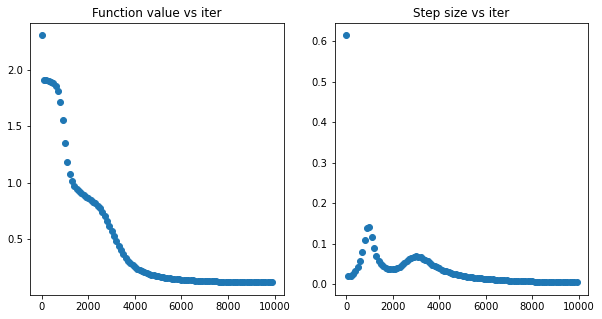


Train accuracy:  0.9747899159663865 
Test accuracy:  0.9


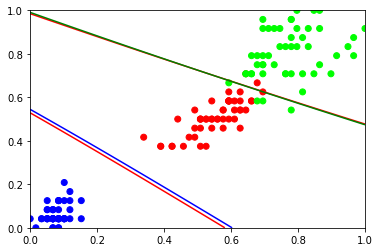

In [12]:
d = 1
l = 0.0
idx = [2,3]
hiddenlayers = [4,8]
m = Xtr.shape[0]
lr = 0.1
theta0,Xtr,Ytr,topology = buildmodel(iris.Xtrain,iris.Ytrain,d,idx,hiddenlayers)
_,Xte,Yte,_ = buildmodel(iris.Xtest,iris.Ytest,d,idx,hiddenlayers)

F = lambda theta,X,Y: forwardprop(theta,topology,X,Y,l)
f = lambda theta,a,Y: backprop(theta,topology,a,Y,l)
gd = SGD(lr=lr,epochs=10000,batch=m//1,plot=True)
thetaOPT = gd.train(F,f,Xtr,Ytr,theta0)
PlotBoundary(iris,thetaOPT,d,idx,topology,l)

tr = testAccuracy(Xtr,Ytr,thetaOPT,topology,l)
te = testAccuracy(Xte,Yte,thetaOPT,topology,l)
print('\nTrain accuracy: ',tr,'\nTest accuracy: ',te)
plt.show()